In [1]:
#!pip install seaborn

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
filename= "../data/kobe/kobe_bryant_shot_data.csv"
df = pd.read_csv(filename, na_values={'shot_made_flag': ''})

In [5]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [6]:
df.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id'],
      dtype='object')

In [7]:
df.shot_made_flag.value_counts(dropna=False)

 0.0    14232
 1.0    11465
NaN      5000
Name: shot_made_flag, dtype: int64

In [8]:
df = df.dropna()

In [9]:
df['team_name'].head()

1    Los Angeles Lakers
2    Los Angeles Lakers
3    Los Angeles Lakers
4    Los Angeles Lakers
5    Los Angeles Lakers
Name: team_name, dtype: object

In [10]:
df['team_name'].unique()

array(['Los Angeles Lakers'], dtype=object)

In [11]:
df['combined_shot_type'].head()

1    Jump Shot
2    Jump Shot
3    Jump Shot
4         Dunk
5    Jump Shot
Name: combined_shot_type, dtype: object

In [12]:
df['combined_shot_type'].value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

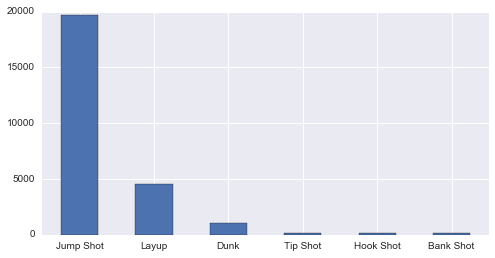

In [13]:
df['combined_shot_type'].value_counts().plot(kind='bar', figsize=(8, 4), rot=0)

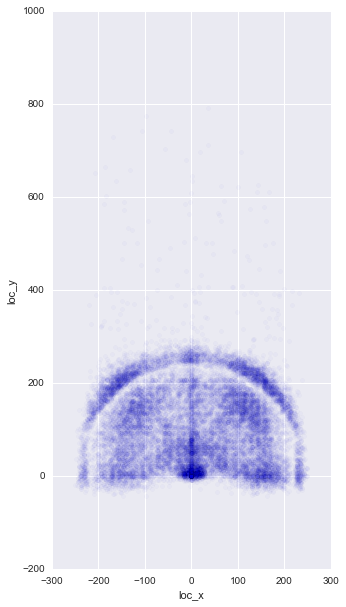

In [14]:
df.plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.02, figsize=(5,10))

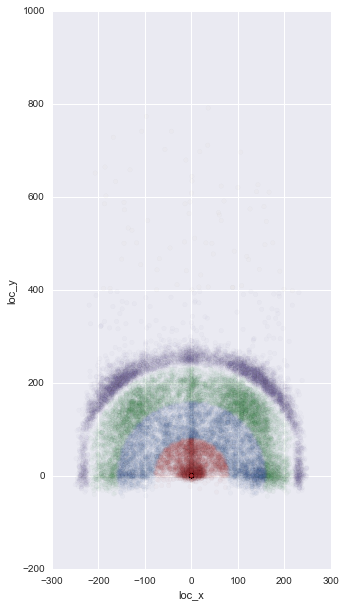

In [15]:
ranges = df.shot_zone_range.unique()

cmap = {range_name:color for range_name, color in zip(ranges, sns.color_palette(n_colors=len(ranges)))}

df.plot(kind='scatter', x='loc_x', y='loc_y', alpha=0.03, figsize=(5,10),
    c=df.shot_zone_range.map(cmap))

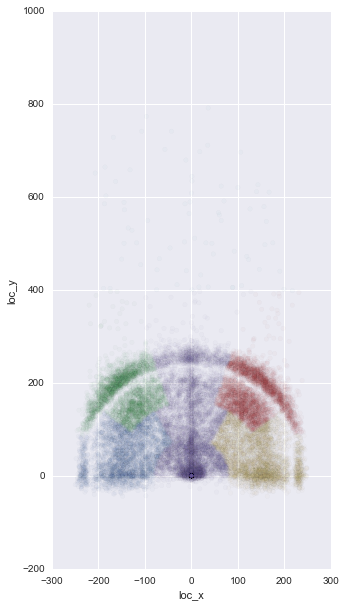

In [20]:
zones = df.shot_zone_area.unique()
cmap = {zone_name:color for zone_name, color in zip(zones, sns.color_palette(n_colors=len(zones)))}

df.plot(kind='scatter', x='loc_x', y='loc_y', alpha=0.03, figsize=(5,10),
    c=df.shot_zone_area.map(cmap))